In [2]:
import pandas as pd
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [3]:
customers.info()
products.info()
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [4]:
#missing values

In [8]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [9]:
print(customers.head())



  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [10]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [11]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [12]:
#check duplicates and removing

customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()


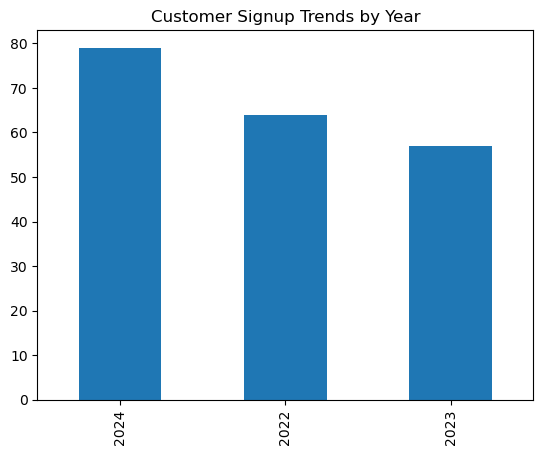

In [13]:
import matplotlib.pyplot as plt
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupDate'].dt.year.value_counts().plot(kind='bar')
plt.title('Customer Signup Trends by Year')
plt.show()


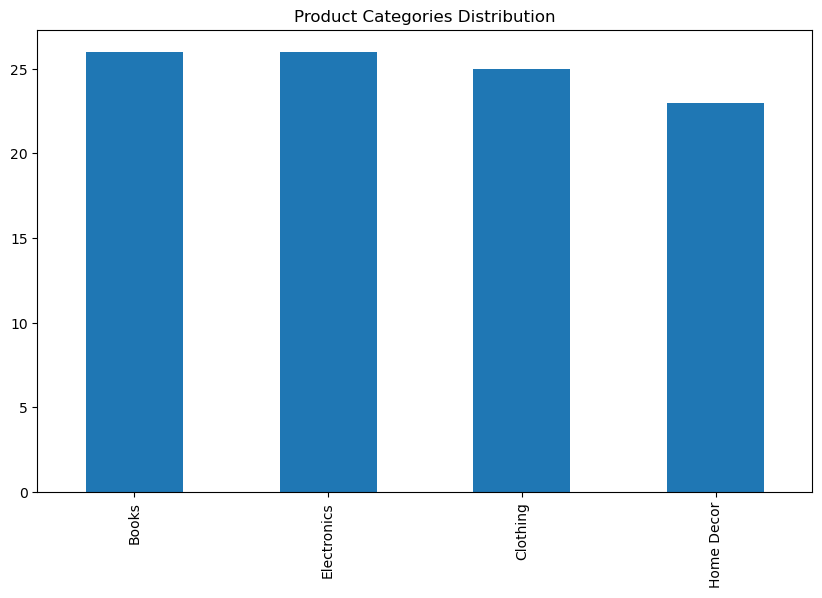

In [14]:
products['Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Product Categories Distribution')
plt.show()


In [15]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_customers)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [16]:
#merging datasets

# Merge Customers and Transactions
customer_transactions = transactions.merge(customers, on='CustomerID', how='inner')

# Merge the result with Products
merged_data = customer_transactions.merge(products, on='ProductID', how='inner')



  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Elec

In [17]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


Region
South America    304
North America    244
Europe           234
Asia             218
Name: TransactionID, dtype: int64


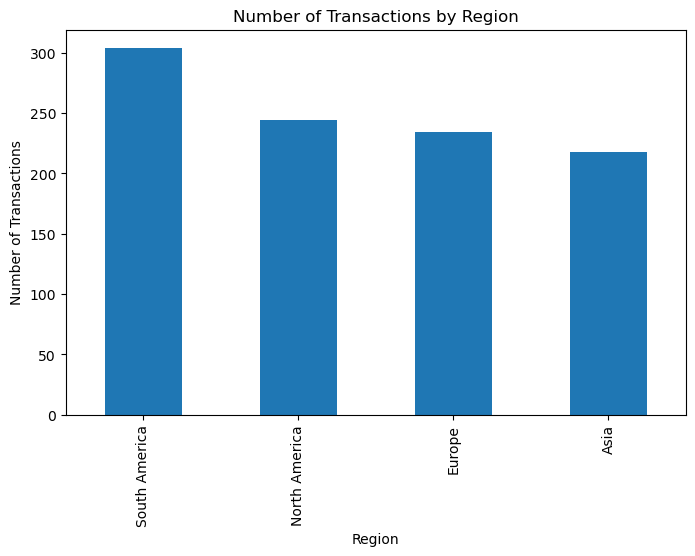

In [18]:
# Count transactions by region
region_activity = merged_data.groupby('Region')['TransactionID'].nunique().sort_values(ascending=False)

print(region_activity)

# Viz
import matplotlib.pyplot as plt

region_activity.plot(kind='bar', figsize=(8, 5))
plt.title('Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


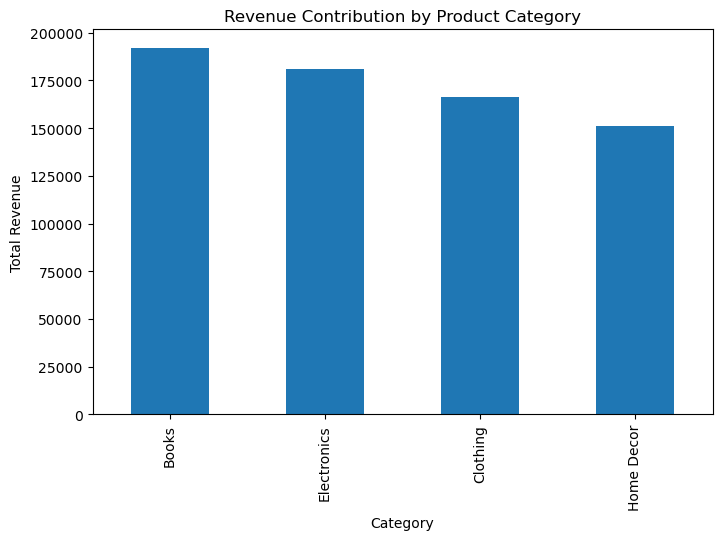

In [19]:
# Revenue by category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

print(category_revenue)

# Viz
category_revenue.plot(kind='bar', figsize=(8, 5))
plt.title('Revenue Contribution by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()


Month
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: TransactionID, dtype: int64


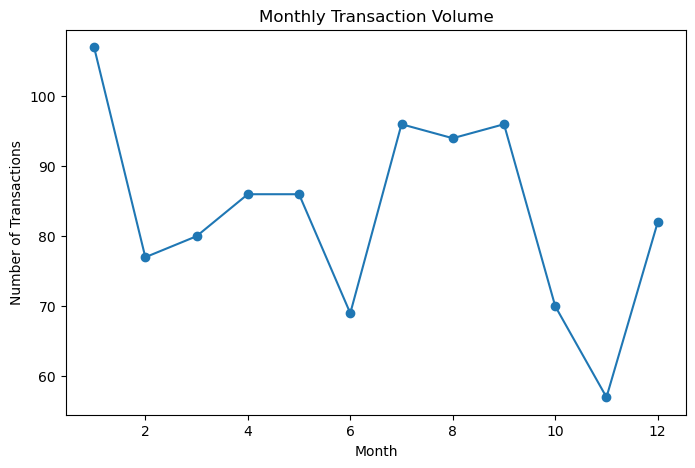

In [20]:
# Extract month from TransactionDate
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.month

# Monthly transaction volume
monthly_sales = merged_data.groupby('Month')['TransactionID'].nunique()

print(monthly_sales)

# Viz
monthly_sales.plot(kind='line', marker='o', figsize=(8, 5))
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


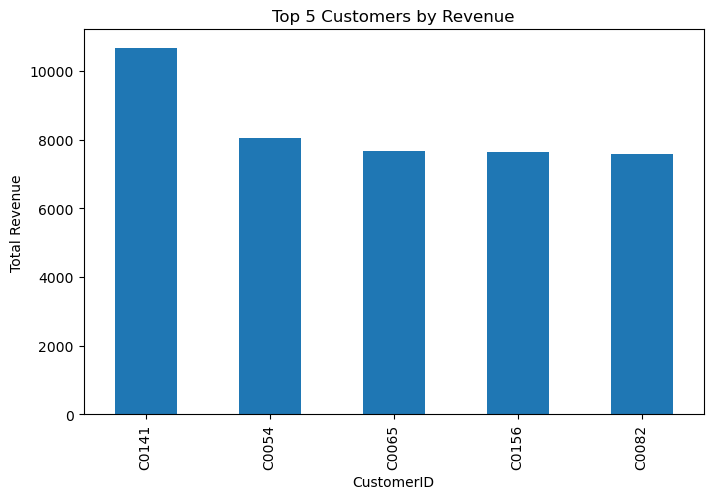

In [21]:
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

print(customer_revenue.head())

# Top 5 customers viz
customer_revenue.head(5).plot(kind='bar', figsize=(8, 5))
plt.title('Top 5 Customers by Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.show()

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


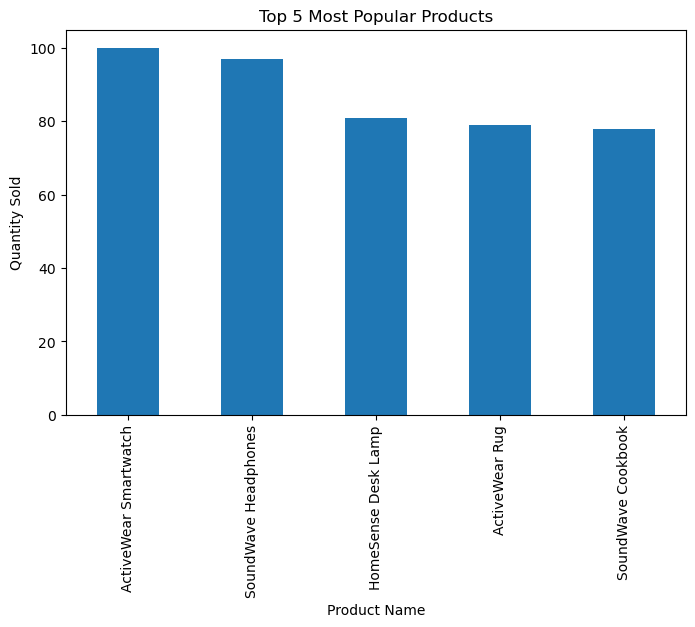

In [22]:
product_popularity = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

print(product_popularity.head())

# Viz
product_popularity.head(5).plot(kind='bar', figsize=(8, 5))
plt.title('Top 5 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()

In [23]:
# Calculate average revenue per transaction
avg_revenue = merged_data['TotalValue'].mean()

print(f"Average Revenue Per Transaction: ${avg_revenue:.2f}")


Average Revenue Per Transaction: $690.00


Repeat Customers: 187
One-Time Customers: 12


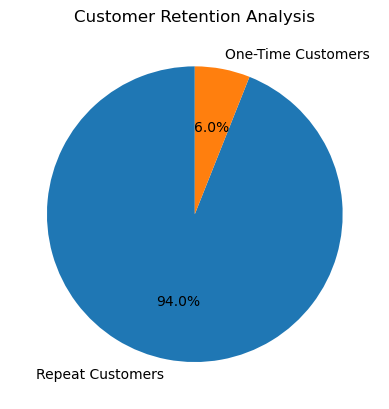

In [24]:
# Count unique transactions for each customer
customer_transactions = merged_data.groupby('CustomerID')['TransactionID'].nunique()

# Categorize customers
repeat_customers = (customer_transactions > 1).sum()
one_time_customers = (customer_transactions == 1).sum()

print(f"Repeat Customers: {repeat_customers}")
print(f"One-Time Customers: {one_time_customers}")

# Viz
import matplotlib.pyplot as plt

plt.pie(
    [repeat_customers, one_time_customers],
    labels=['Repeat Customers', 'One-Time Customers'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Customer Retention Analysis')
plt.show()


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


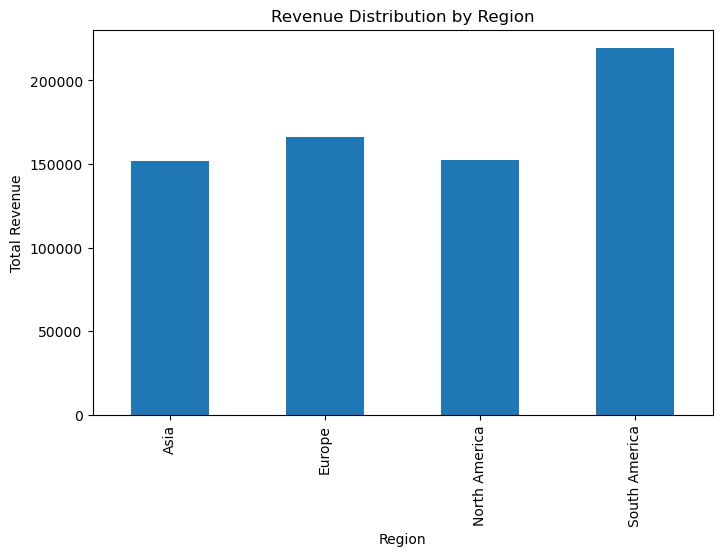

In [25]:
# Revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()

print(region_revenue)

# Viz
region_revenue.plot(kind='bar', figsize=(8, 5))
plt.title('Revenue Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()


            Quantity   Price_x   Price_y  TotalValue
Quantity    1.000000 -0.009378 -0.009378    0.609972
Price_x    -0.009378  1.000000  1.000000    0.722714
Price_y    -0.009378  1.000000  1.000000    0.722714
TotalValue  0.609972  0.722714  0.722714    1.000000


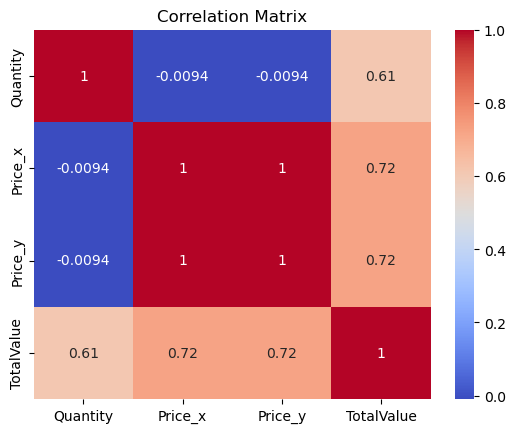

In [27]:
# Correlation matrix for numerical columns
correlation_matrix = merged_data[['Quantity', 'Price_x','Price_y', 'TotalValue']].corr()

print(correlation_matrix)

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


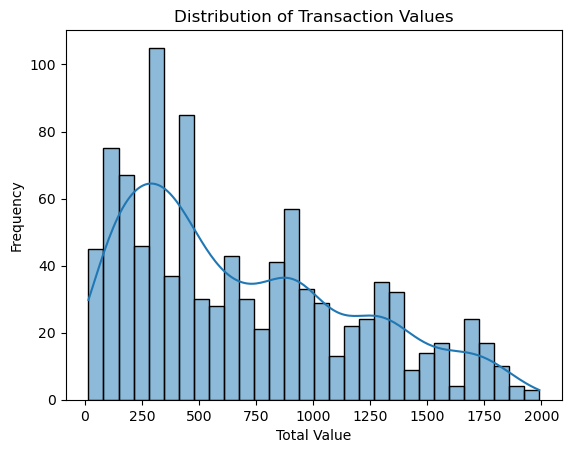

In [28]:
# Distribution plot
sns.histplot(merged_data['TotalValue'], kde=True, bins=30)
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()


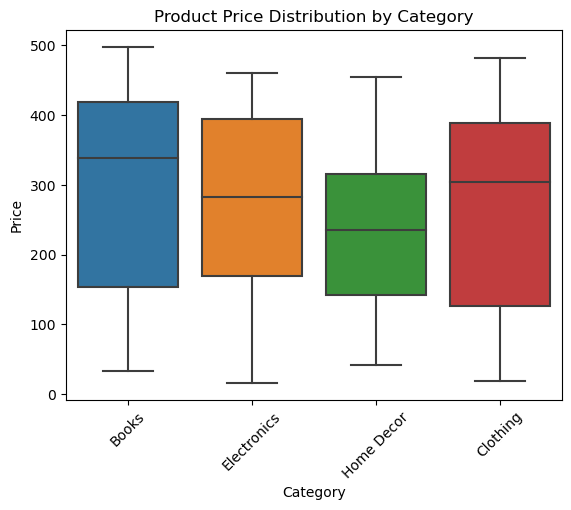

In [29]:
# Boxplot of product prices by category
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Product Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()


In [30]:
#  total revenue by customer
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum()

#  top 10% customer revenue contribution
total_revenue = customer_revenue.sum()
top_10_percent = customer_revenue.sort_values(ascending=False).head(int(len(customer_revenue) * 0.1)).sum()

print(f"Top 10% Customers Contribute: {top_10_percent / total_revenue * 100:.2f}% of Total Revenue")


Top 10% Customers Contribute: 19.11% of Total Revenue
